<a href="https://colab.research.google.com/github/Tudped/Exploratory_analysis/blob/main/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno # missing value
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# User define function

# function to find outlier
def findoutlier(dataframe, variable, quantile_pc):
    q1 = dataframe[variable].quantile(quantile_pc)
    q3 = dataframe[variable].quantile(1 - quantile_pc)
    lowerlimit = q1 - (1.5 * (q3 - q1))
    upperlimit = q3 + (1.5 * (q3 - q1))
    numoutlier = ((dataframe[variable] < lowerlimit)|(dataframe[variable] > upperlimit)).sum()
    sns.boxplot(data = dataframe[variable], orient='h')
    print("Q1: ", q1)
    print("Q3: ", q3)
    print("lower limit: ", lowerlimit.round(2))
    print("upper limit: ", upperlimit.round(2))
    print("Number for outliers: ", numoutlier, "(", (numoutlier/df.shape[0]).round(3),"%)")
    return lowerlimit, upperlimit

def removeoutlier(dataframe, variable, quantile_pc):
    lowerlimit, upperlimit = findoutlier(dataframe, variable, quantile_pc)
    dataframe = dataframe[((dataframe[variable] > lowerlimit) & (dataframe[variable] < upperlimit))]
    return dataframe

def plotTopRec(dataframe, variable, NumRec):
    plt.figure(figsize=(10,5))
    plt.xlabel(variable)
    plt.ylabel(dataframe.index.name)
    plt.title("Top " + variable +" by " + dataframe.index.name)
    plt.xticks(rotation=90, fontsize=8)
    sns.barplot(x=dataframe.head(NumRec).index, y=dataframe[variable].head(NumRec))
    plt.show()
    display(dataframe.head(NumRec).T)

# Exploratory Data Analysis

## Import data
Vijaykumar Ummadisetty (October 25, 2017). *Online Retail Dataset*. Kaggle. https://www.kaggle.com/datasets/vijayuv/onlineretail

In [5]:
# df = pd.read_csv("data/medical_raw_data.csv")
df = pd.read_csv("online_retail.csv", encoding='unicode_escape')

Let's see what we are working with...

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Count Dataset variable type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Data Cleaning
##### Finding duplicated records and missing values

In [8]:
print("Number of duplicated: ", df.duplicated().sum())
print("Dataframe shape: ", df.shape)

Number of duplicated:  5268
Dataframe shape:  (541909, 8)


In [9]:
# Number of missing values by features
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

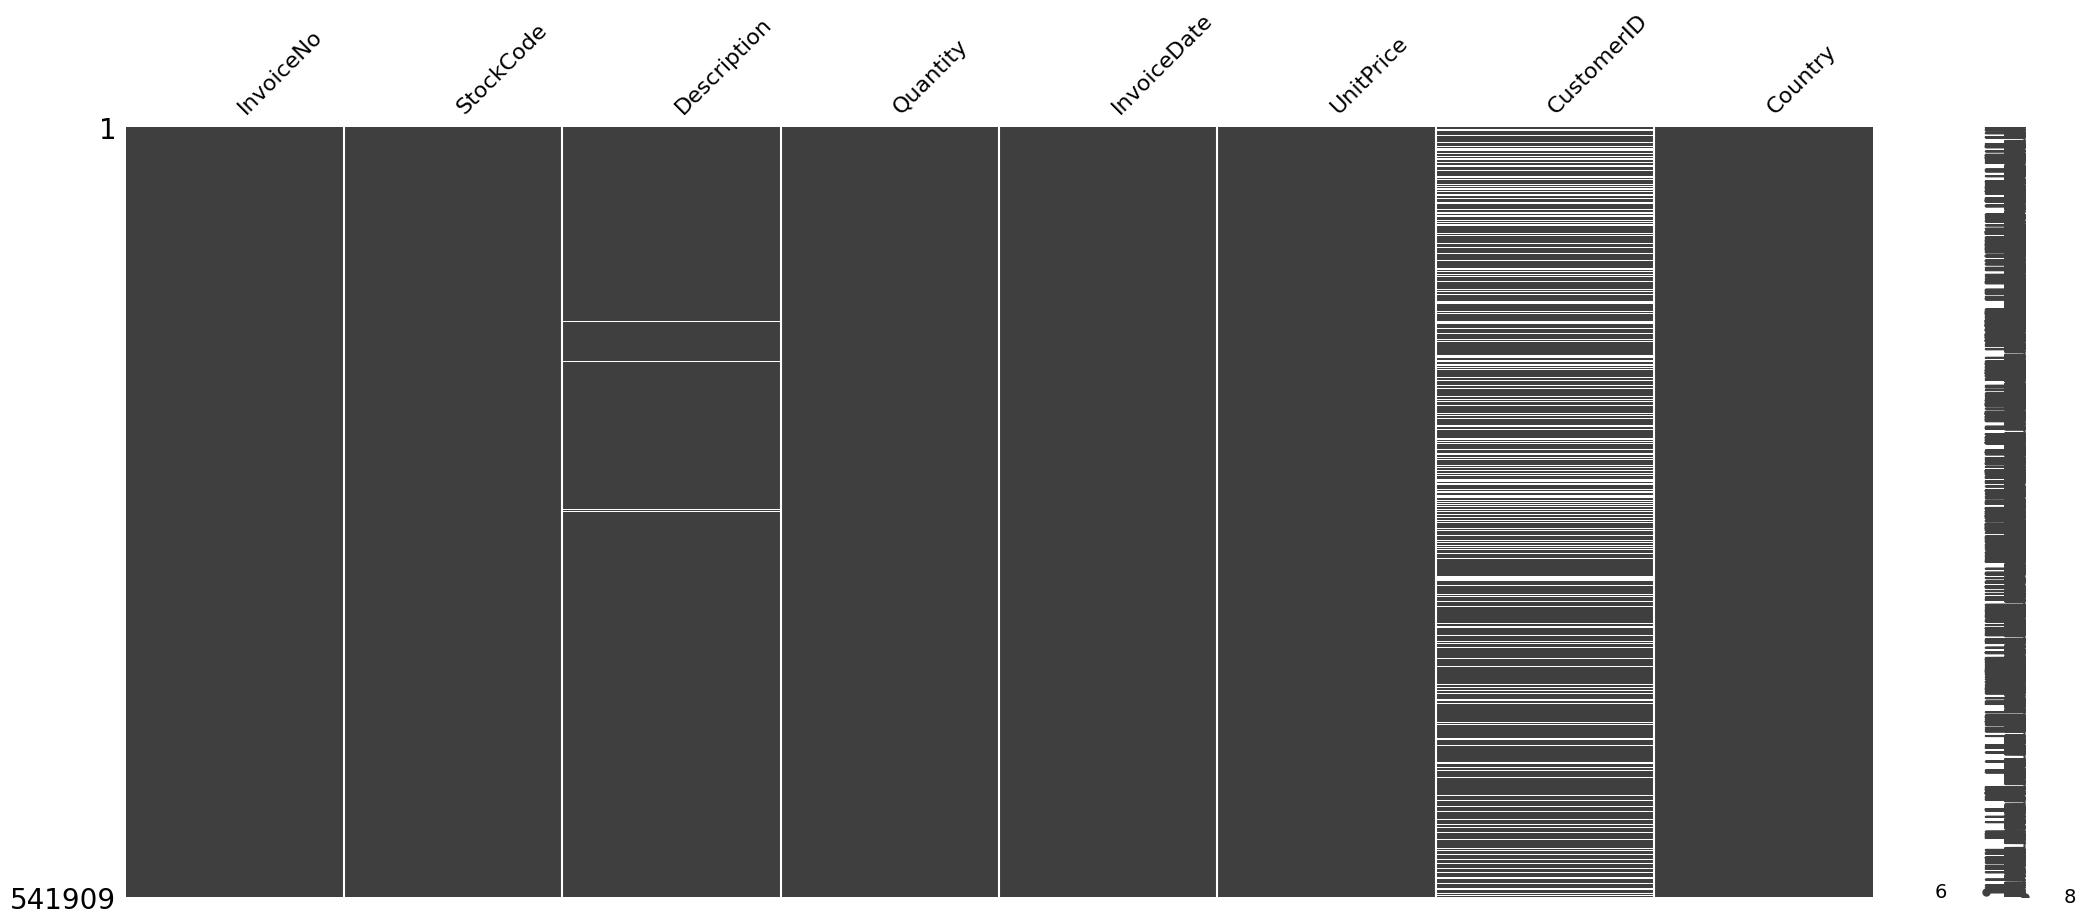

In [10]:
msno.matrix(df)

#### What we know so for ...
* Data has 8 features: 5 char, 1 int, and 2 float.
* 5268 Duplicates records
* 136,335 missing value: 1454 are Descrition, 135080 are CustomerID
* Data with negative unit price or quanity should be remove

## Data wrangling

#### Treating Missing Values

In [11]:
print("Shape of orginal data: ", df.shape)
print("Shape of data after drop NaN: ", df.dropna().shape)

Shape of orginal data:  (541909, 8)
Shape of data after drop NaN:  (406829, 8)


In [12]:
# Drop missing values
df = df.dropna()

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Finding and dealing with duplicates

In [14]:
print("Number of dupliated records: ", df.duplicated().sum())

Number of dupliated records:  5225


In [15]:
# Delete duplicate record
df = df.drop_duplicates(keep="first")

In [16]:
print("Number of dupliated after treating: ", df.duplicated().sum())

Number of dupliated after treating:  0


#### Finding return items

In [17]:
print("Number for records with negative unit price: ", (df["UnitPrice"]<0).sum())

Number for records with negative unit price:  0


In [18]:
print("Number for records with negative quantity: ", (df["Quantity"]<0).sum())

Number for records with negative quantity:  8872


Droping returns records

In [19]:
# df.drop((df[df["Quantity"]<0]), axis=0)
df = df[df["Quantity"]>=0]

In [20]:
print("Number for records with negative quantity: ", (df["Quantity"]<0).sum())

Number for records with negative quantity:  0


In [21]:
df.shape

(392732, 8)

#### Identify and treating outliers

<Axes: >

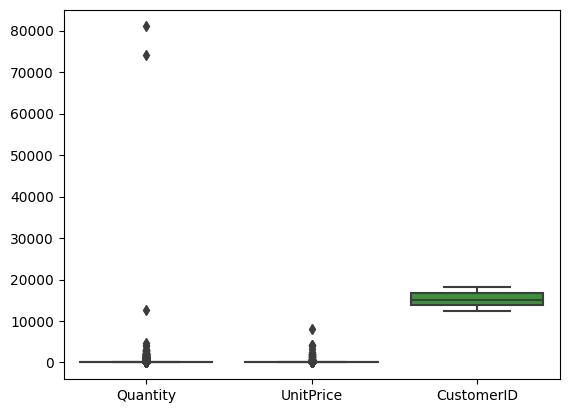

In [22]:
sns.boxplot(df)

Q1:  0.55
Q3:  6.35
lower limit:  -8.15
upper limit:  15.05
Number for outliers:  3488 ( 0.009 %)


(-8.149999999999999, 15.049999999999999)

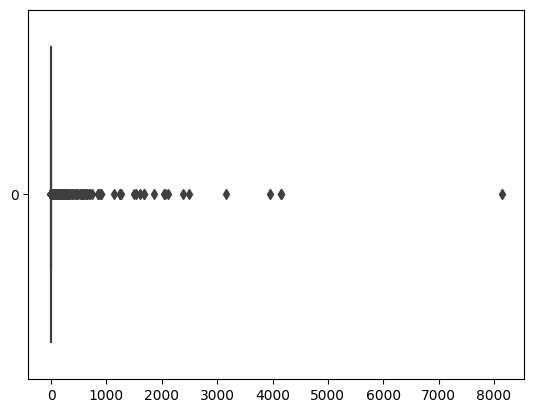

In [23]:
# Identify outlier
findoutlier(df,"UnitPrice", 0.1)

Q1:  0.55
Q3:  6.35
lower limit:  -8.15
upper limit:  15.05
Number for outliers:  3488 ( 0.009 %)


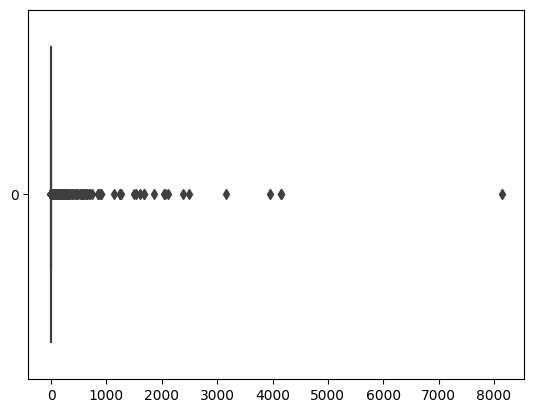

In [24]:
dfout = removeoutlier(df, "UnitPrice", 0.1)

<Axes: >

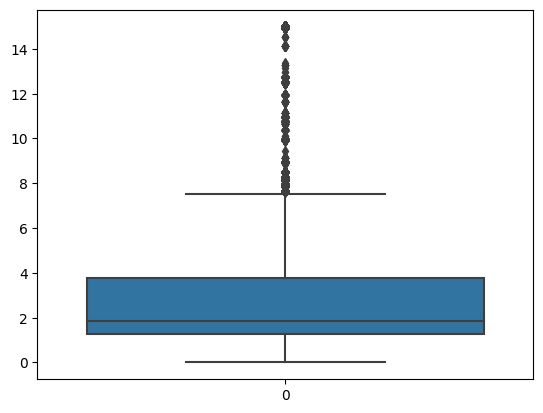

In [25]:
sns.boxplot(dfout['UnitPrice'])

Q1:  1.0
Q3:  24.0
lower limit:  -33.5
upper limit:  58.5
Number for outliers:  11531 ( 0.029 %)


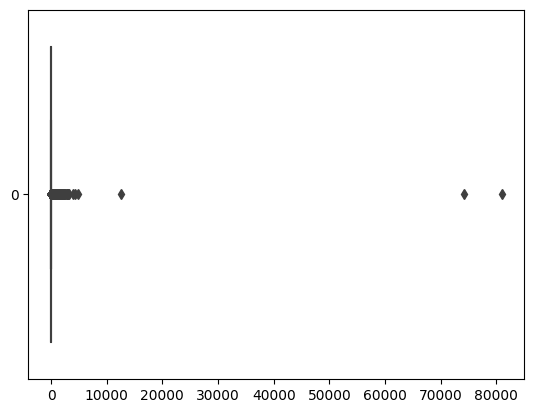

In [26]:
dfout = removeoutlier(df, "Quantity", 0.1)

#### Outliers removed. However, for this data set, all data are kept for analysis.

## Exploratory Data Analysis

In [27]:
# Let's look at data again
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [28]:
# number of Uniques:
df.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

### Descriptive Analysis

In [29]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [30]:
df.describe(include=object)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,392732,392732,392732,392732,392732
unique,18536,3665,3877,17286,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,11/14/2011 15:27,United Kingdom
freq,542,2023,2016,542,349227


## Data Engineer

In [31]:
# Adding Revenue column
df['Revenue'] = df['UnitPrice']*df['Quantity']

In [32]:
# change Invoice Date to dateTime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   Revenue      392732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 38.0+ MB


In [34]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


### What questions we can ask?
* Which country has the highest revenue?
* What items sells the most?
* Number of customer by country?

In [35]:
#top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
top_countries = df.groupby('Country').agg({'Revenue':lambda x:x.sum()}).sort_values('Revenue', ascending=False)

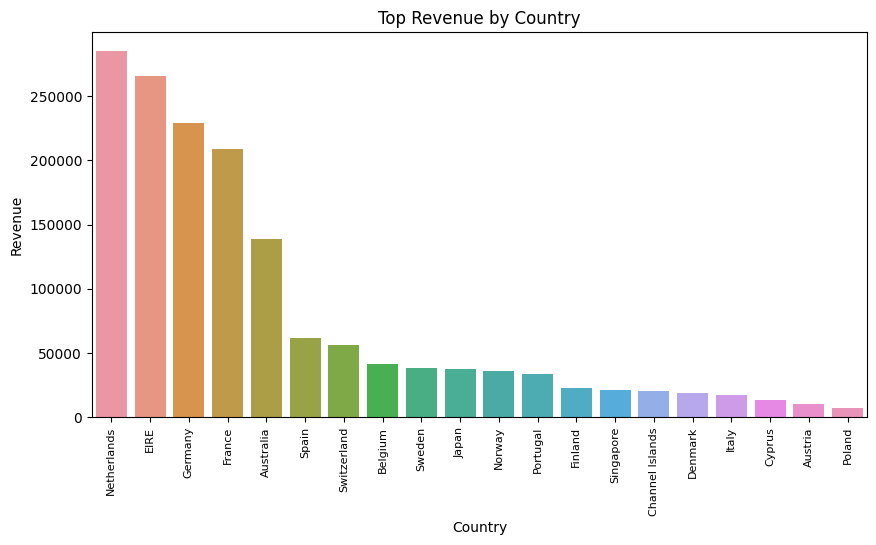

Country,Netherlands,EIRE,Germany,France,Australia,Spain,Switzerland,Belgium,Sweden,Japan,Norway,Portugal,Finland,Singapore,Channel Islands,Denmark,Italy,Cyprus,Austria,Poland
Revenue,285446.34,265262.46,228678.4,208934.31,138453.81,61558.56,56443.95,41196.34,38367.83,37416.37,36165.44,33375.84,22546.08,21279.29,20440.54,18955.34,17483.24,13502.85,10198.68,7334.65


In [36]:
plotTopRec(top_countries.tail(-1), "Revenue", 20)

#### Number of customer by country

In [37]:
#cusbycountry = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
#print(cusbycountry.head(5))
cusbycountry = df.groupby('Country').agg({'CustomerID': lambda x:x.nunique()}).sort_values('CustomerID', ascending=False)

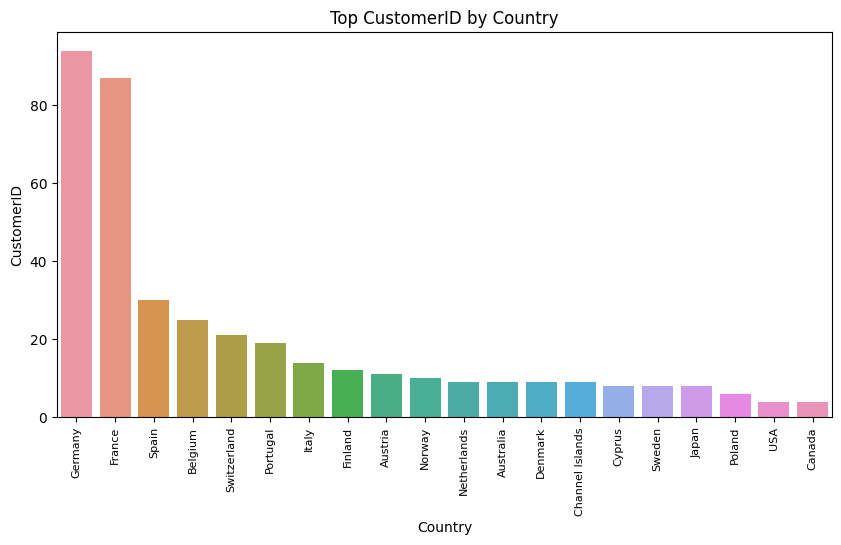

Country,Germany,France,Spain,Belgium,Switzerland,Portugal,Italy,Finland,Austria,Norway,Netherlands,Australia,Denmark,Channel Islands,Cyprus,Sweden,Japan,Poland,USA,Canada
CustomerID,94,87,30,25,21,19,14,12,11,10,9,9,9,9,8,8,8,6,4,4


In [38]:
# Excluding UK for better visualization
plotTopRec(cusbycountry.tail(-1), "CustomerID", 20)

#### What items sell the most?

In [39]:
# df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
most_sell_item = df.groupby('Description').agg({'Quantity': lambda x:x.sum()}).sort_values('Quantity',ascending=False)

In [40]:
most_sell_item.head(5)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
JUMBO BAG RED RETROSPOT,46078
WHITE HANGING HEART T-LIGHT HOLDER,36706


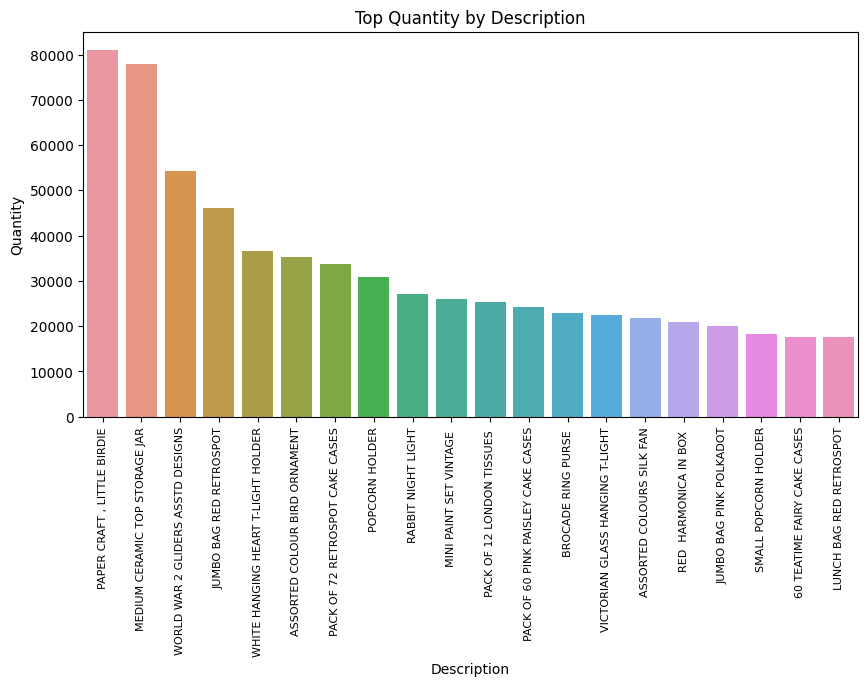

Description,"PAPER CRAFT , LITTLE BIRDIE",MEDIUM CERAMIC TOP STORAGE JAR,WORLD WAR 2 GLIDERS ASSTD DESIGNS,JUMBO BAG RED RETROSPOT,WHITE HANGING HEART T-LIGHT HOLDER,ASSORTED COLOUR BIRD ORNAMENT,PACK OF 72 RETROSPOT CAKE CASES,POPCORN HOLDER,RABBIT NIGHT LIGHT,MINI PAINT SET VINTAGE,PACK OF 12 LONDON TISSUES,PACK OF 60 PINK PAISLEY CAKE CASES,BROCADE RING PURSE,VICTORIAN GLASS HANGING T-LIGHT,ASSORTED COLOURS SILK FAN,RED HARMONICA IN BOX,JUMBO BAG PINK POLKADOT,SMALL POPCORN HOLDER,60 TEATIME FAIRY CAKE CASES,LUNCH BAG RED RETROSPOT
Quantity,80995,77916,54319,46078,36706,35263,33670,30919,27153,26076,25329,24230,22927,22404,21876,20945,20148,18241,17664,17576


In [41]:
plotTopRec(most_sell_item, 'Quantity', 20)